# Taffic Sign Classification

### Traffic Sign Classification Using Convolutional Neural Networks (CNNs), Which is widely used in various applications in the field of Artificial Intelligence. This notebook focuses on developing a deep learning model in order to classify the traffic signs.

In [1]:
# Initialisation Cell

import numpy as np
import pandas as pd
import keras

from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import BatchNormalization, Conv2D, MaxPooling2D

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline
from tensorflow.keras.utils import plot_model
import matplotlib.cm as cm
import matplotlib.colors as colors

# Splitting data
from sklearn.model_selection import train_test_split

# Metrics 
from sklearn.metrics import confusion_matrix, classification_report

# Deep Learning
import tensorflow as tf
print('TensoFlow Version: ', tf.__version__)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications.resnet import ResNet50

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

TensoFlow Version:  2.4.1


In [2]:
import os
path = 'data'
lab = pd.read_csv('data/traffic_sign_labels.csv')

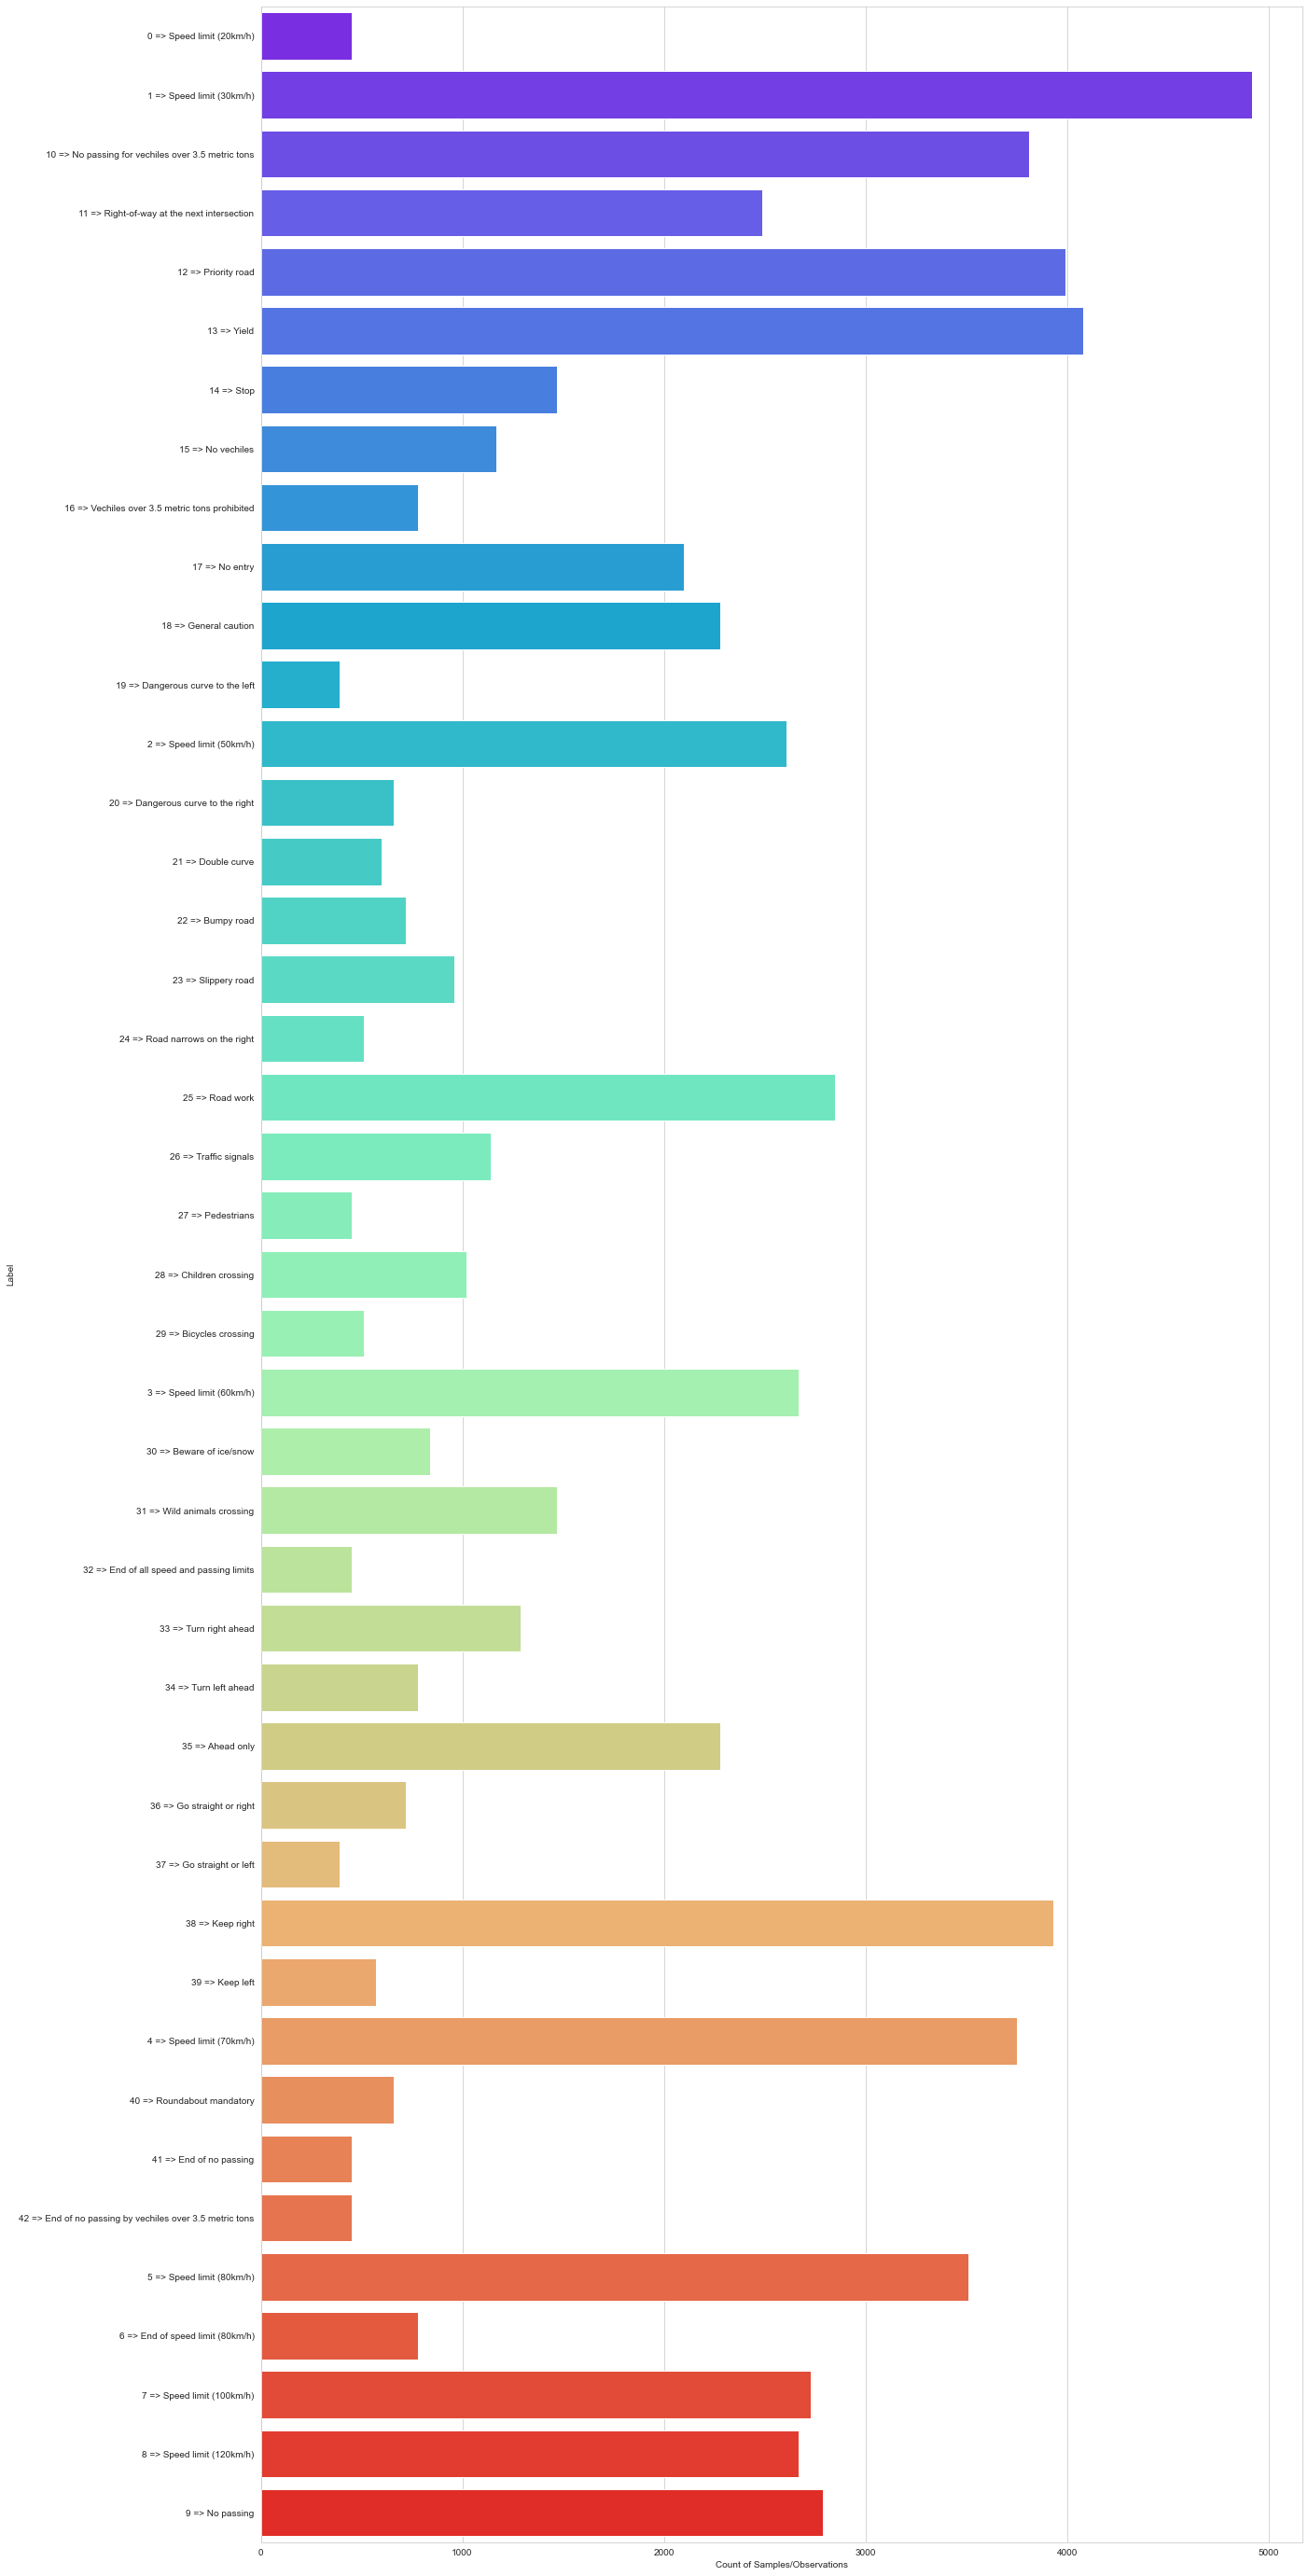

In [3]:
# Count PLot of the samples/observations w.r.t the classes
d = dict()
class_labels = dict()

for dirs in os.listdir(path + '/myData'):
    count = len(os.listdir(path+'/myData/'+dirs))
    d[dirs+' => '+lab[lab.ClassId == int(dirs)].values[0][1]] = count
    class_labels[int(dirs)] = lab[lab.ClassId == int(dirs)].values[0][1]

plt.figure(figsize = (20, 50))
sns.barplot(y = list(d.keys()), x = list(d.values()), palette = 'rainbow')
plt.ylabel('Label')
plt.xlabel('Count of Samples/Observations');

### Reading Image Data

In [4]:
# input image dimensions
img_rows, img_cols = 32, 32
# The images are RGB.
img_channels = 3
nb_classes = len(class_labels.keys())

datagen = ImageDataGenerator()
data = datagen.flow_from_directory('data/myData',
                                    target_size=(32, 32),
                                    batch_size=73139,
                                    class_mode='categorical',
                                    shuffle=True )

Found 73139 images belonging to 43 classes.


In [5]:
X , y = data.next()

In [6]:
# Labels are one hot encoded
print(f"Data Shape   :{X.shape}\nLabels shape :{y.shape}")

Data Shape   :(73139, 32, 32, 3)
Labels shape :(73139, 43)


### Sample Images of Dataset

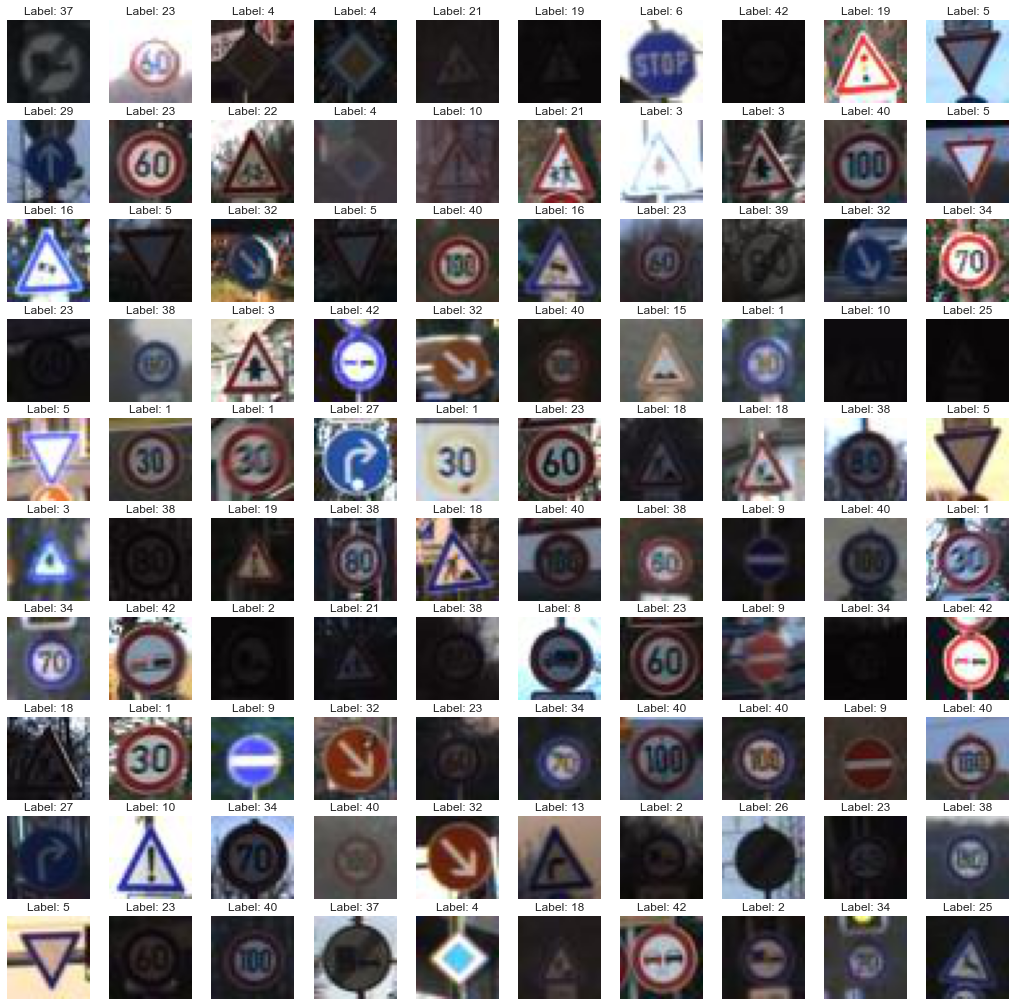

In [7]:
fig, axes = plt.subplots(10,10, figsize=(18,18))
for i, ax in enumerate(axes.flat):
    r = np.random.randint(X.shape[0])
    ax.imshow(X[r].astype('uint8'))
    ax.grid(False)
    ax.axis('off')
    ax.set_title('Label: ' + str(np.argmax(y[r])))

### Dividing data into train and test in the split percentage of 75:25

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [9]:
print("Train Shape: {}\nTest Shape : {}".format(X_train.shape, X_test.shape))

Train Shape: (54854, 32, 32, 3)
Test Shape : (18285, 32, 32, 3)


## Model Construction

### First CNN

The first network is a quick and shallow one to test how hard learning the data will be.

In [10]:
model_1 = Sequential()


## 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2), padding='same',
                 input_shape=X_train.shape[1:]))
model_1.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2)))
model_1.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(nb_classes))
model_1.add(Activation('softmax'))

model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 16, 32)        2432      
_________________________________________________________________
activation (Activation)      (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 32)          25632     
_________________________________________________________________
activation_1 (Activation)    (None, 6, 6, 32)          0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 3, 3, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 3, 3, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 288)               0

In [11]:
batch_size = 32

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0005, decay=1e-6)

# Let's train the model using RMSprop
model_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_1.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=15,
              validation_data=(X_test, y_test),
              shuffle=True)

Epoch 1/15
1715/1715 [==============================] - 29s 16ms/step - loss: 4.5634 - accuracy: 0.0648 - val_loss: 3.4801 - val_accuracy: 0.0680
Epoch 2/15
1715/1715 [==============================] - 31s 18ms/step - loss: 3.5401 - accuracy: 0.0683 - val_loss: 3.5189 - val_accuracy: 0.0708
Epoch 3/15
1715/1715 [==============================] - 24s 14ms/step - loss: 3.5048 - accuracy: 0.0688 - val_loss: 3.4785 - val_accuracy: 0.0684
Epoch 4/15
1715/1715 [==============================] - 28s 16ms/step - loss: 3.5148 - accuracy: 0.0694 - val_loss: 3.4810 - val_accuracy: 0.0681
Epoch 5/15
1715/1715 [==============================] - 28s 16ms/step - loss: 3.4919 - accuracy: 0.0685 - val_loss: 3.4794 - val_accuracy: 0.0680
Epoch 6/15
1715/1715 [==============================] - 27s 16ms/step - loss: 3.4921 - accuracy: 0.0689 - val_loss: 3.4819 - val_accuracy: 0.0673
Epoch 7/15
1715/1715 [==============================] - 29s 17ms/step - loss: 3.4975 - accuracy: 0.0689 - val_loss: 3.4792 -

Very badly, so the data isn't going to be easy. Let's try a bit deeper of a network, while still keeping the architecture simple.

### Deeper CNN

In [12]:
model_2 = Sequential()

model_2.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=X_train.shape[1:]))
model_2.add(Activation('relu'))
model_2.add(Conv2D(32, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(64, (3, 3), padding='same'))
model_2.add(Activation('relu'))
model_2.add(Conv2D(64, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

model_2.add(Flatten())
model_2.add(Dense(512))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(nb_classes))
model_2.add(Activation('softmax'))

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_4 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_5 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 64)       

In [13]:
# initiate RMSprop optimizer
opt_2 = keras.optimizers.RMSprop(lr=0.0005)

# Let's train the model using RMSprop
model_2.compile(loss='categorical_crossentropy',
              optimizer=opt_2,
              metrics=['accuracy'])

model_2.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=5,
              validation_data=(X_test, y_test),
              shuffle=True)

Epoch 1/5
1715/1715 [==============================] - 160s 93ms/step - loss: 2.6685 - accuracy: 0.4732 - val_loss: 0.0934 - val_accuracy: 0.9779
Epoch 2/5
1715/1715 [==============================] - 157s 92ms/step - loss: 0.2521 - accuracy: 0.9303 - val_loss: 0.0867 - val_accuracy: 0.9790
Epoch 3/5
1715/1715 [==============================] - 156s 91ms/step - loss: 0.1713 - accuracy: 0.9562 - val_loss: 0.0485 - val_accuracy: 0.9881
Epoch 4/5
1715/1715 [==============================] - 157s 92ms/step - loss: 0.1509 - accuracy: 0.9638 - val_loss: 0.0268 - val_accuracy: 0.9941
Epoch 5/5
1715/1715 [==============================] - 164s 96ms/step - loss: 0.1435 - accuracy: 0.9684 - val_loss: 0.0434 - val_accuracy: 0.9897


A huge improvement, and quite accurate, but let's see how far we can push it with a more powerful architecture. It should also be noted first that the accuracy and loss have not reached a plateau, so more epochs could very well improve it, but for now the idea is sufficient that it is accurate but not perfect. So for the final attempt, we can try a version of the ResNet architecture from keras.

### ResNet50 Model

In [14]:
resnet = ResNet50(weights= None, include_top=False, input_shape= (img_rows,img_cols,img_channels))

In [15]:
x = resnet.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
predictions = Dense(nb_classes, activation= 'softmax')(x)
rn_model = Model(inputs = resnet.input, outputs = predictions)

In [16]:
rn_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [17]:
rn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
# Callbacks
model_check = ModelCheckpoint('best_model.h5', monitor='val_accuracy', verbose=0, save_best_only=True, mode='max')

early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=5, verbose=0, mode='max', restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

csv_logger = CSVLogger('train_log.csv', separator=',')

In [19]:
# Fitting model
n_epochs = 10
history =  rn_model.fit(X_train, y_train,  batch_size = 32, epochs = n_epochs, verbose = 1, 
                        validation_data = (X_test, y_test), callbacks = [model_check, early, reduce_lr, csv_logger])

Epoch 1/10
1715/1715 [==============================] - 4593s 3s/step - loss: 4.3089 - accuracy: 0.1584 - val_loss: 8.9254 - val_accuracy: 0.3990
Epoch 2/10
1715/1715 [==============================] - 4698s 3s/step - loss: 2.5836 - accuracy: 0.4785 - val_loss: 1.4265 - val_accuracy: 0.5741
Epoch 3/10
1715/1715 [==============================] - 4465s 3s/step - loss: 1.7697 - accuracy: 0.6199 - val_loss: 0.5402 - val_accuracy: 0.8212
Epoch 4/10
1715/1715 [==============================] - 4533s 3s/step - loss: 0.5768 - accuracy: 0.8321 - val_loss: 0.5444 - val_accuracy: 0.8203
Epoch 5/10
1715/1715 [==============================] - 4508s 3s/step - loss: 0.3260 - accuracy: 0.9088 - val_loss: 0.7866 - val_accuracy: 0.7685
Epoch 6/10
1715/1715 [==============================] - 4370s 3s/step - loss: 0.5076 - accuracy: 0.8736 - val_loss: 0.2026 - val_accuracy: 0.9384
Epoch 7/10
1715/1715 [==============================] - 4337s 3s/step - loss: 0.4125 - accuracy: 0.8911 - val_loss: 0.0968 -

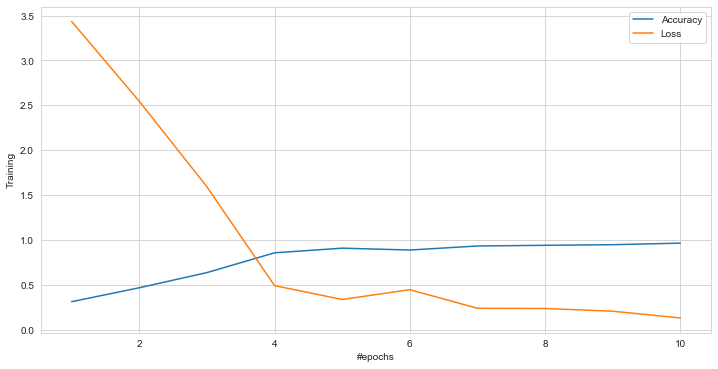

In [20]:
q = len(list(history.history['loss']))
plt.figure(figsize=(12, 6))
sns.lineplot(x = range(1, 1+q), y = history.history['accuracy'], label = 'Accuracy')
sns.lineplot(x = range(1, 1+q), y = history.history['loss'], label = 'Loss')
plt.xlabel('#epochs')
plt.ylabel('Training')
plt.legend();

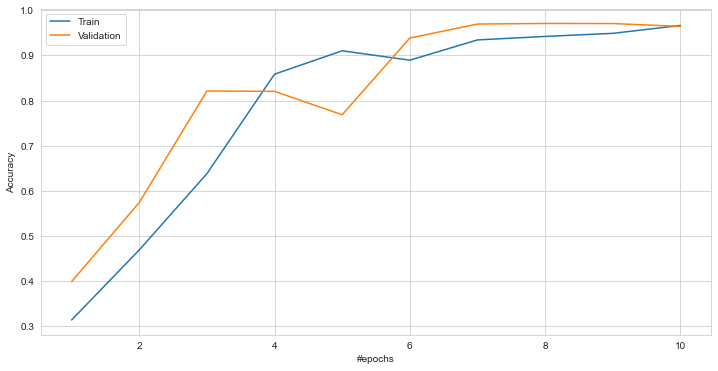

In [21]:
plt.figure(figsize=(12, 6))
sns.lineplot(x = range(1, 1+q), y = history.history['accuracy'], label = 'Train')
sns.lineplot(x = range(1, 1+q), y = history.history['val_accuracy'], label = 'Validation')
plt.xlabel('#epochs')
plt.ylabel('Accuracy')
plt.legend();

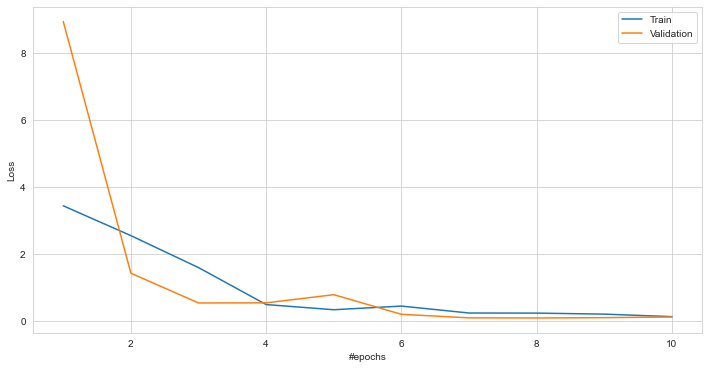

In [22]:
plt.figure(figsize=(12, 6))
sns.lineplot(x = range(1, 1+q), y = history.history['loss'], label = 'Train')
sns.lineplot(x = range(1, 1+q), y = history.history['val_loss'], label = 'Validation')
plt.xlabel('#epochs')
plt.ylabel('Loss')
plt.legend();

In [26]:
pred = np.argmax(rn_model.predict(X_test), axis = 1)

In [27]:
labels = [class_labels[i] for i in range(43)]
print(classification_report(np.argmax(y_test, axis = 1), pred, target_names = labels))

                                                    precision    recall  f1-score   support

                              Speed limit (20km/h)       1.00      0.97      0.98       123
                              Speed limit (30km/h)       0.99      0.95      0.97      1212
                              Speed limit (50km/h)       0.99      0.98      0.98       935
                              Speed limit (60km/h)       1.00      0.98      0.99       626
                              Speed limit (70km/h)       0.98      0.99      0.98       994
                              Speed limit (80km/h)       1.00      0.95      0.97      1018
                       End of speed limit (80km/h)       0.95      1.00      0.97       318
                             Speed limit (100km/h)       0.98      0.95      0.97       277
                             Speed limit (120km/h)       1.00      0.92      0.96       203
                                        No passing       0.97      1.00      0.

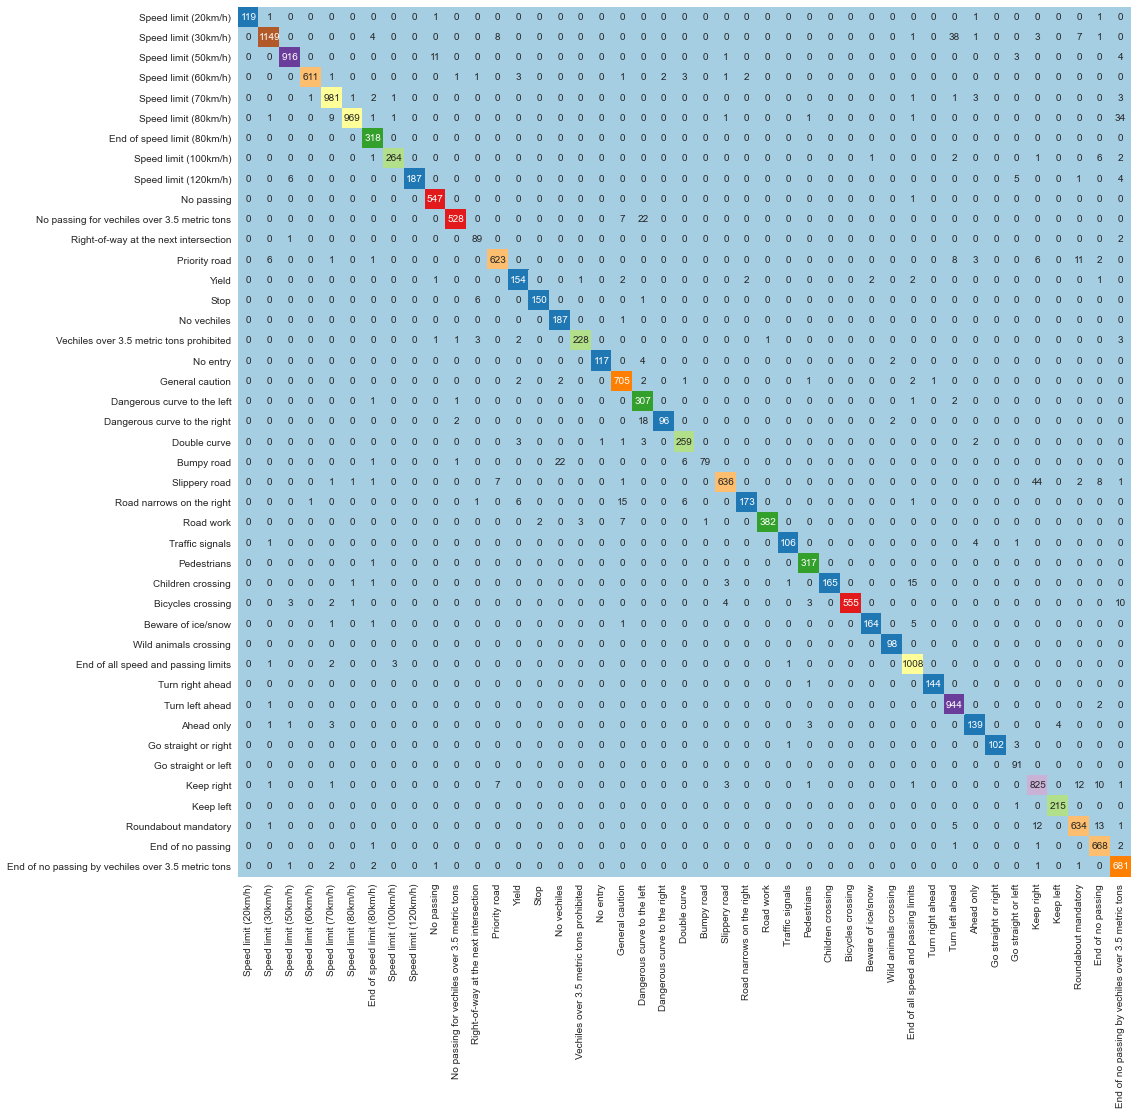

In [28]:
cmat = confusion_matrix(np.argmax(y_test, axis=1), pred)
plt.figure(figsize=(16,16))
sns.heatmap(cmat, annot = True, cbar = False, cmap='Paired', fmt="d", xticklabels=labels, yticklabels=labels);

In [29]:
classwise_acc = cmat.diagonal()/cmat.sum(axis=1) * 100 
cls_acc = pd.DataFrame({'Class_Label':[class_labels[i] for i in range(43)], 'Accuracy': classwise_acc.tolist()}, columns = ['Class_Label', 'Accuracy'])
cls_acc.style.format({"Accuracy": "{:,.2f}",}).hide_index().bar(subset=["Accuracy"], color='cyan')

Class_Label,Accuracy
Speed limit (20km/h),96.75
Speed limit (30km/h),94.80
Speed limit (50km/h),97.97
Speed limit (60km/h),97.60
Speed limit (70km/h),98.69
Speed limit (80km/h),95.19
End of speed limit (80km/h),100.00
Speed limit (100km/h),95.31
Speed limit (120km/h),92.12
No passing,99.82


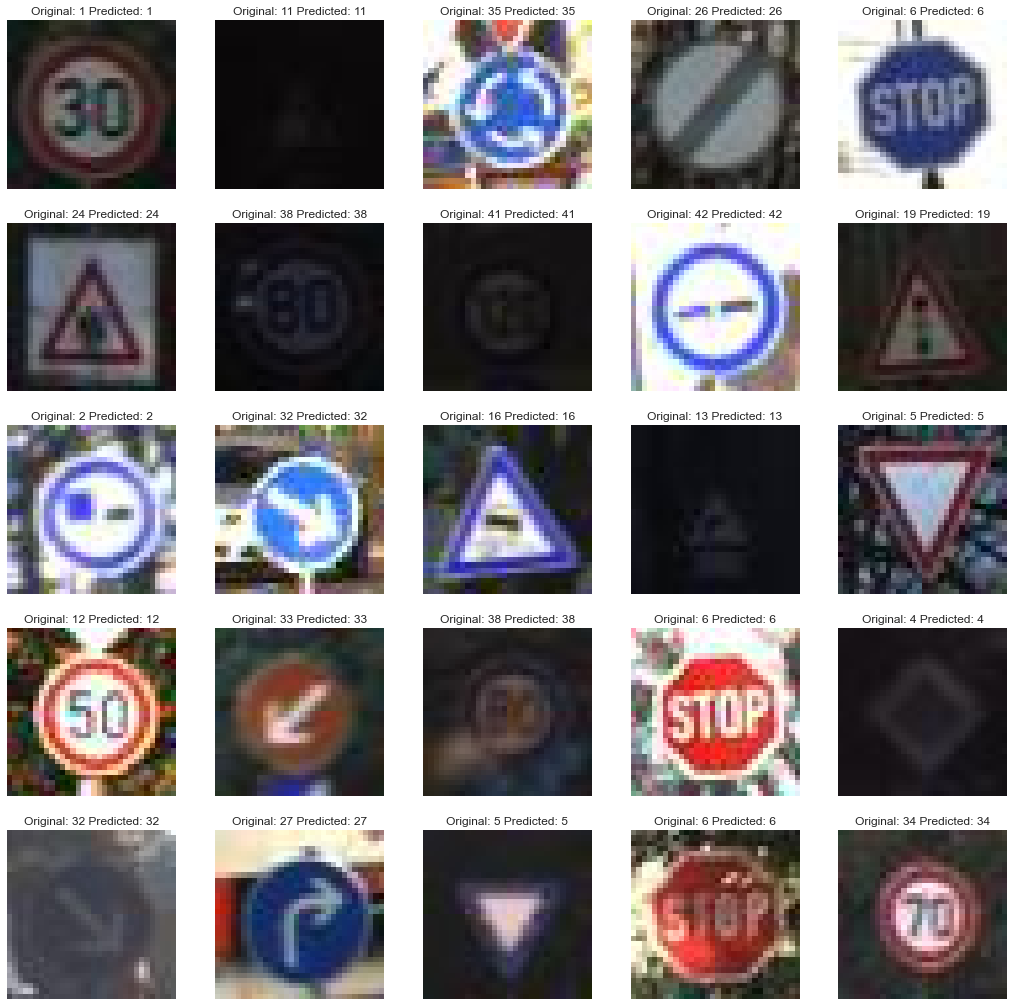

In [30]:
fig, axes = plt.subplots(5,5, figsize=(18,18))
for i,ax in enumerate(axes.flat):
    r = np.random.randint(X_test.shape[0])
    ax.imshow(X_test[r].astype('uint8'))
    ax.grid(False)
    ax.axis('off')
    ax.set_title('Original: {} Predicted: {}'.format(np.argmax(y_test[r]), np.argmax(rn_model.predict(X_test[r].reshape(1, 32, 32, 3)))))